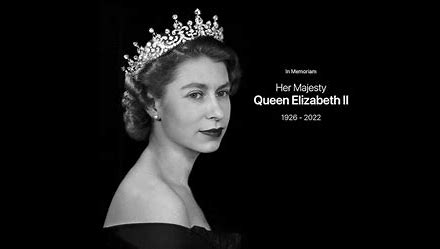

## **Sentiment analysis twitter user's tweets on the death of Queen Elizabeth II**

#### *This notebook is by Nana Amina Abubakar*



This is a Data Analysis Project using Python(Jupyter Notebook) for sentiment analysis and EDA and PowerBi for visualization.The Queens death generated a lot of traction on twitter. I therefore took the interest to perform a sentiment analysis to understand what the data tells us about this memorable event as shared online. This notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), NLTK (Natural Language Toolkit), TextBlob (for Sentiment Analysis), MatPlotlib & WordCloud (for Data Visualization).

---

### Content

---

1. [Import Libraries](#1.-Import-Libraries)


2. [EDA](#2.-EDA)


3. [Sentiment Analysis](#3.-Sentiment-Analysis)


4. [Closing Remarks and Links](#4.-Closing-Remarks-and-Links)


### 1. Import Libraries

In [1]:
# Pandas DataFrame Toolkit
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing Toolkit
import nltk
from nltk.corpus import stopwords # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import sent_tokenize, word_tokenize # to create word tokens
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging
import time
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import words

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly
import plotly.graph_objects as go

# WordCloud - Python Toolkit for creating image wordclouds
from wordcloud import WordCloud


### 2. EDA

In [2]:
df = pd.read_csv("eliza_geolocation.csv")
df.head()

Unnamed: 0.1  Unnamed: 0                       Date  \
0             0           0  2022-09-08 23:59:59+00:00   
1             1           1  2022-09-08 23:59:59+00:00   
2             2           2  2022-09-08 23:59:59+00:00   
3             5           5  2022-09-08 23:59:59+00:00   
4             6           6  2022-09-08 23:59:59+00:00   

                                            TweetURL             User  \
0  https://twitter.com/Aaronzboi1/status/15680263...       Aaronzboi1   
1  https://twitter.com/AST_HQ/status/156802639603...           AST_HQ   
2  https://twitter.com/cheescara/status/156802639...        cheescara   
3  https://twitter.com/fairryysue/status/15680263...       fairryysue   
4  https://twitter.com/seasidecourtney/status/156...  seasidecourtney   

                Source                               Location  \
0  Twitter for Android                                    NaN   
1  Twitter for Android         London/Islamabad/Dhaka/Beijing   
2  Twitter for Android  (nsfw) 24 \nany prns\nic by @dammyien   
3   Twitter for iPhone            dorcas meadowes worshipper    
4   Twitter for iPhone                  Menahkwesk/Saint John   

                                               Tweet  Likes_Count  \
0  You will forever be remembered\nR.I.P Queen......            0   
1  #London: Prince Harry to attend Queen Elizabet...            9   
2   the queen didnt survive scaramouche design leaks            4   
3         emmeline vance killed the queen send tweet            0   
4  “It will sing praises of the Queen, speak abou...            3   

   Retweet_Count  Quote_Count  Reply_Count  location_lat  location_long  
0              0            0            0     46.314475      11.048029  
1              2            0            1           NaN            NaN  
2              0            0            0           NaN            NaN  
3              0            0            0           NaN            NaN  
4              0            0            1           NaN            NaN

In [3]:
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)



df['Hashtags'] = df['Tweet'].apply(getHashtags)
df.head()

Unnamed: 0.1  Unnamed: 0                       Date  \
0             0           0  2022-09-08 23:59:59+00:00   
1             1           1  2022-09-08 23:59:59+00:00   
2             2           2  2022-09-08 23:59:59+00:00   
3             5           5  2022-09-08 23:59:59+00:00   
4             6           6  2022-09-08 23:59:59+00:00   

                                            TweetURL             User  \
0  https://twitter.com/Aaronzboi1/status/15680263...       Aaronzboi1   
1  https://twitter.com/AST_HQ/status/156802639603...           AST_HQ   
2  https://twitter.com/cheescara/status/156802639...        cheescara   
3  https://twitter.com/fairryysue/status/15680263...       fairryysue   
4  https://twitter.com/seasidecourtney/status/156...  seasidecourtney   

                Source                               Location  \
0  Twitter for Android                                    NaN   
1  Twitter for Android         London/Islamabad/Dhaka/Beijing   
2  Twitter for Android  (nsfw) 24 \nany prns\nic by @dammyien   
3   Twitter for iPhone            dorcas meadowes worshipper    
4   Twitter for iPhone                  Menahkwesk/Saint John   

                                               Tweet  Likes_Count  \
0  You will forever be remembered\nR.I.P Queen......            0   
1  #London: Prince Harry to attend Queen Elizabet...            9   
2   the queen didnt survive scaramouche design leaks            4   
3         emmeline vance killed the queen send tweet            0   
4  “It will sing praises of the Queen, speak abou...            3   

   Retweet_Count  Quote_Count  Reply_Count  location_lat  location_long  \
0              0            0            0     46.314475      11.048029   
1              2            0            1           NaN            NaN   
2              0            0            0           NaN            NaN   
3              0            0            0           NaN            NaN   
4              0            0            1           NaN            NaN   

                                    Hashtags  
0                            #queenelizabeth  
1  #london #queenelizabeth #queenelizabethii  
2                                             
3                                             
4

In [4]:
hashtags_list = df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 8144.


In [5]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)
hashtags_df

Hashtags  Count  Percentage
0       #queenelizabeth   8148   21.361158
5                #queen   3950   10.355495
2     #queenelizabethii   2344    6.145134
6    #ripqueenelizabeth   1202    3.151216
71                 #rip    837    2.194316
65         #restinpeace    430    1.127307
56         #elizabethii    421    1.103712
45            #ripqueen    394    1.032928
81         #royalfamily    389    1.019820
103    #godsavethequeen    380    0.996225

In [6]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))


# The list below are common words which will not be relevant in our analysis.
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets
#word_list = words.words()  # all words in English language


def preprocessTweets(tweet):
    tweet = tweet.lower()  # changes all words to lower case
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    
    # Remove punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)


df['Processed_Tweets'] = df['Tweet'].apply(preprocessTweets)
df.head()

Unnamed: 0.1  Unnamed: 0                       Date  \
0             0           0  2022-09-08 23:59:59+00:00   
1             1           1  2022-09-08 23:59:59+00:00   
2             2           2  2022-09-08 23:59:59+00:00   
3             5           5  2022-09-08 23:59:59+00:00   
4             6           6  2022-09-08 23:59:59+00:00   

                                            TweetURL             User  \
0  https://twitter.com/Aaronzboi1/status/15680263...       Aaronzboi1   
1  https://twitter.com/AST_HQ/status/156802639603...           AST_HQ   
2  https://twitter.com/cheescara/status/156802639...        cheescara   
3  https://twitter.com/fairryysue/status/15680263...       fairryysue   
4  https://twitter.com/seasidecourtney/status/156...  seasidecourtney   

                Source                               Location  \
0  Twitter for Android                                    NaN   
1  Twitter for Android         London/Islamabad/Dhaka/Beijing   
2  Twitter for Android  (nsfw) 24 \nany prns\nic by @dammyien   
3   Twitter for iPhone            dorcas meadowes worshipper    
4   Twitter for iPhone                  Menahkwesk/Saint John   

                                               Tweet  Likes_Count  \
0  You will forever be remembered\nR.I.P Queen......            0   
1  #London: Prince Harry to attend Queen Elizabet...            9   
2   the queen didnt survive scaramouche design leaks            4   
3         emmeline vance killed the queen send tweet            0   
4  “It will sing praises of the Queen, speak abou...            3   

   Retweet_Count  Quote_Count  Reply_Count  location_lat  location_long  \
0              0            0            0     46.314475      11.048029   
1              2            0            1           NaN            NaN   
2              0            0            0           NaN            NaN   
3              0            0            0           NaN            NaN   
4              0            0            1           NaN            NaN   

                                    Hashtags  \
0                            #queenelizabeth   
1  #london #queenelizabeth #queenelizabethii   
2                                              
3                                              
4                                              

                                    Processed_Tweets  
0                 forever remembered r.i.p queen ...  
1      prince harry attend queen elizabeth ’ funeral  
2        queen didnt survive scaramouche design leak  
3             emmeline vance killed queen send tweet  
4  “ sing praise queen speak stability leadership...

In [7]:
tweets_long_string = df['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [8]:
# Create function to generate the blue colour for the Word CLoud
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(260, 70%%, %d%%)" % random.randint(40, 70)

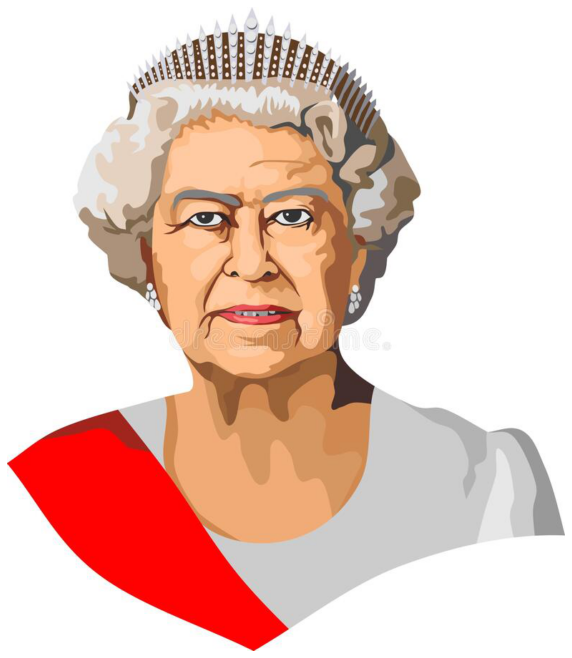

In [9]:
# Import the Queens image 
mask = np.array(Image.open('queen.jpg'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(10) # set width
fig.set_figheight(12) # set height

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

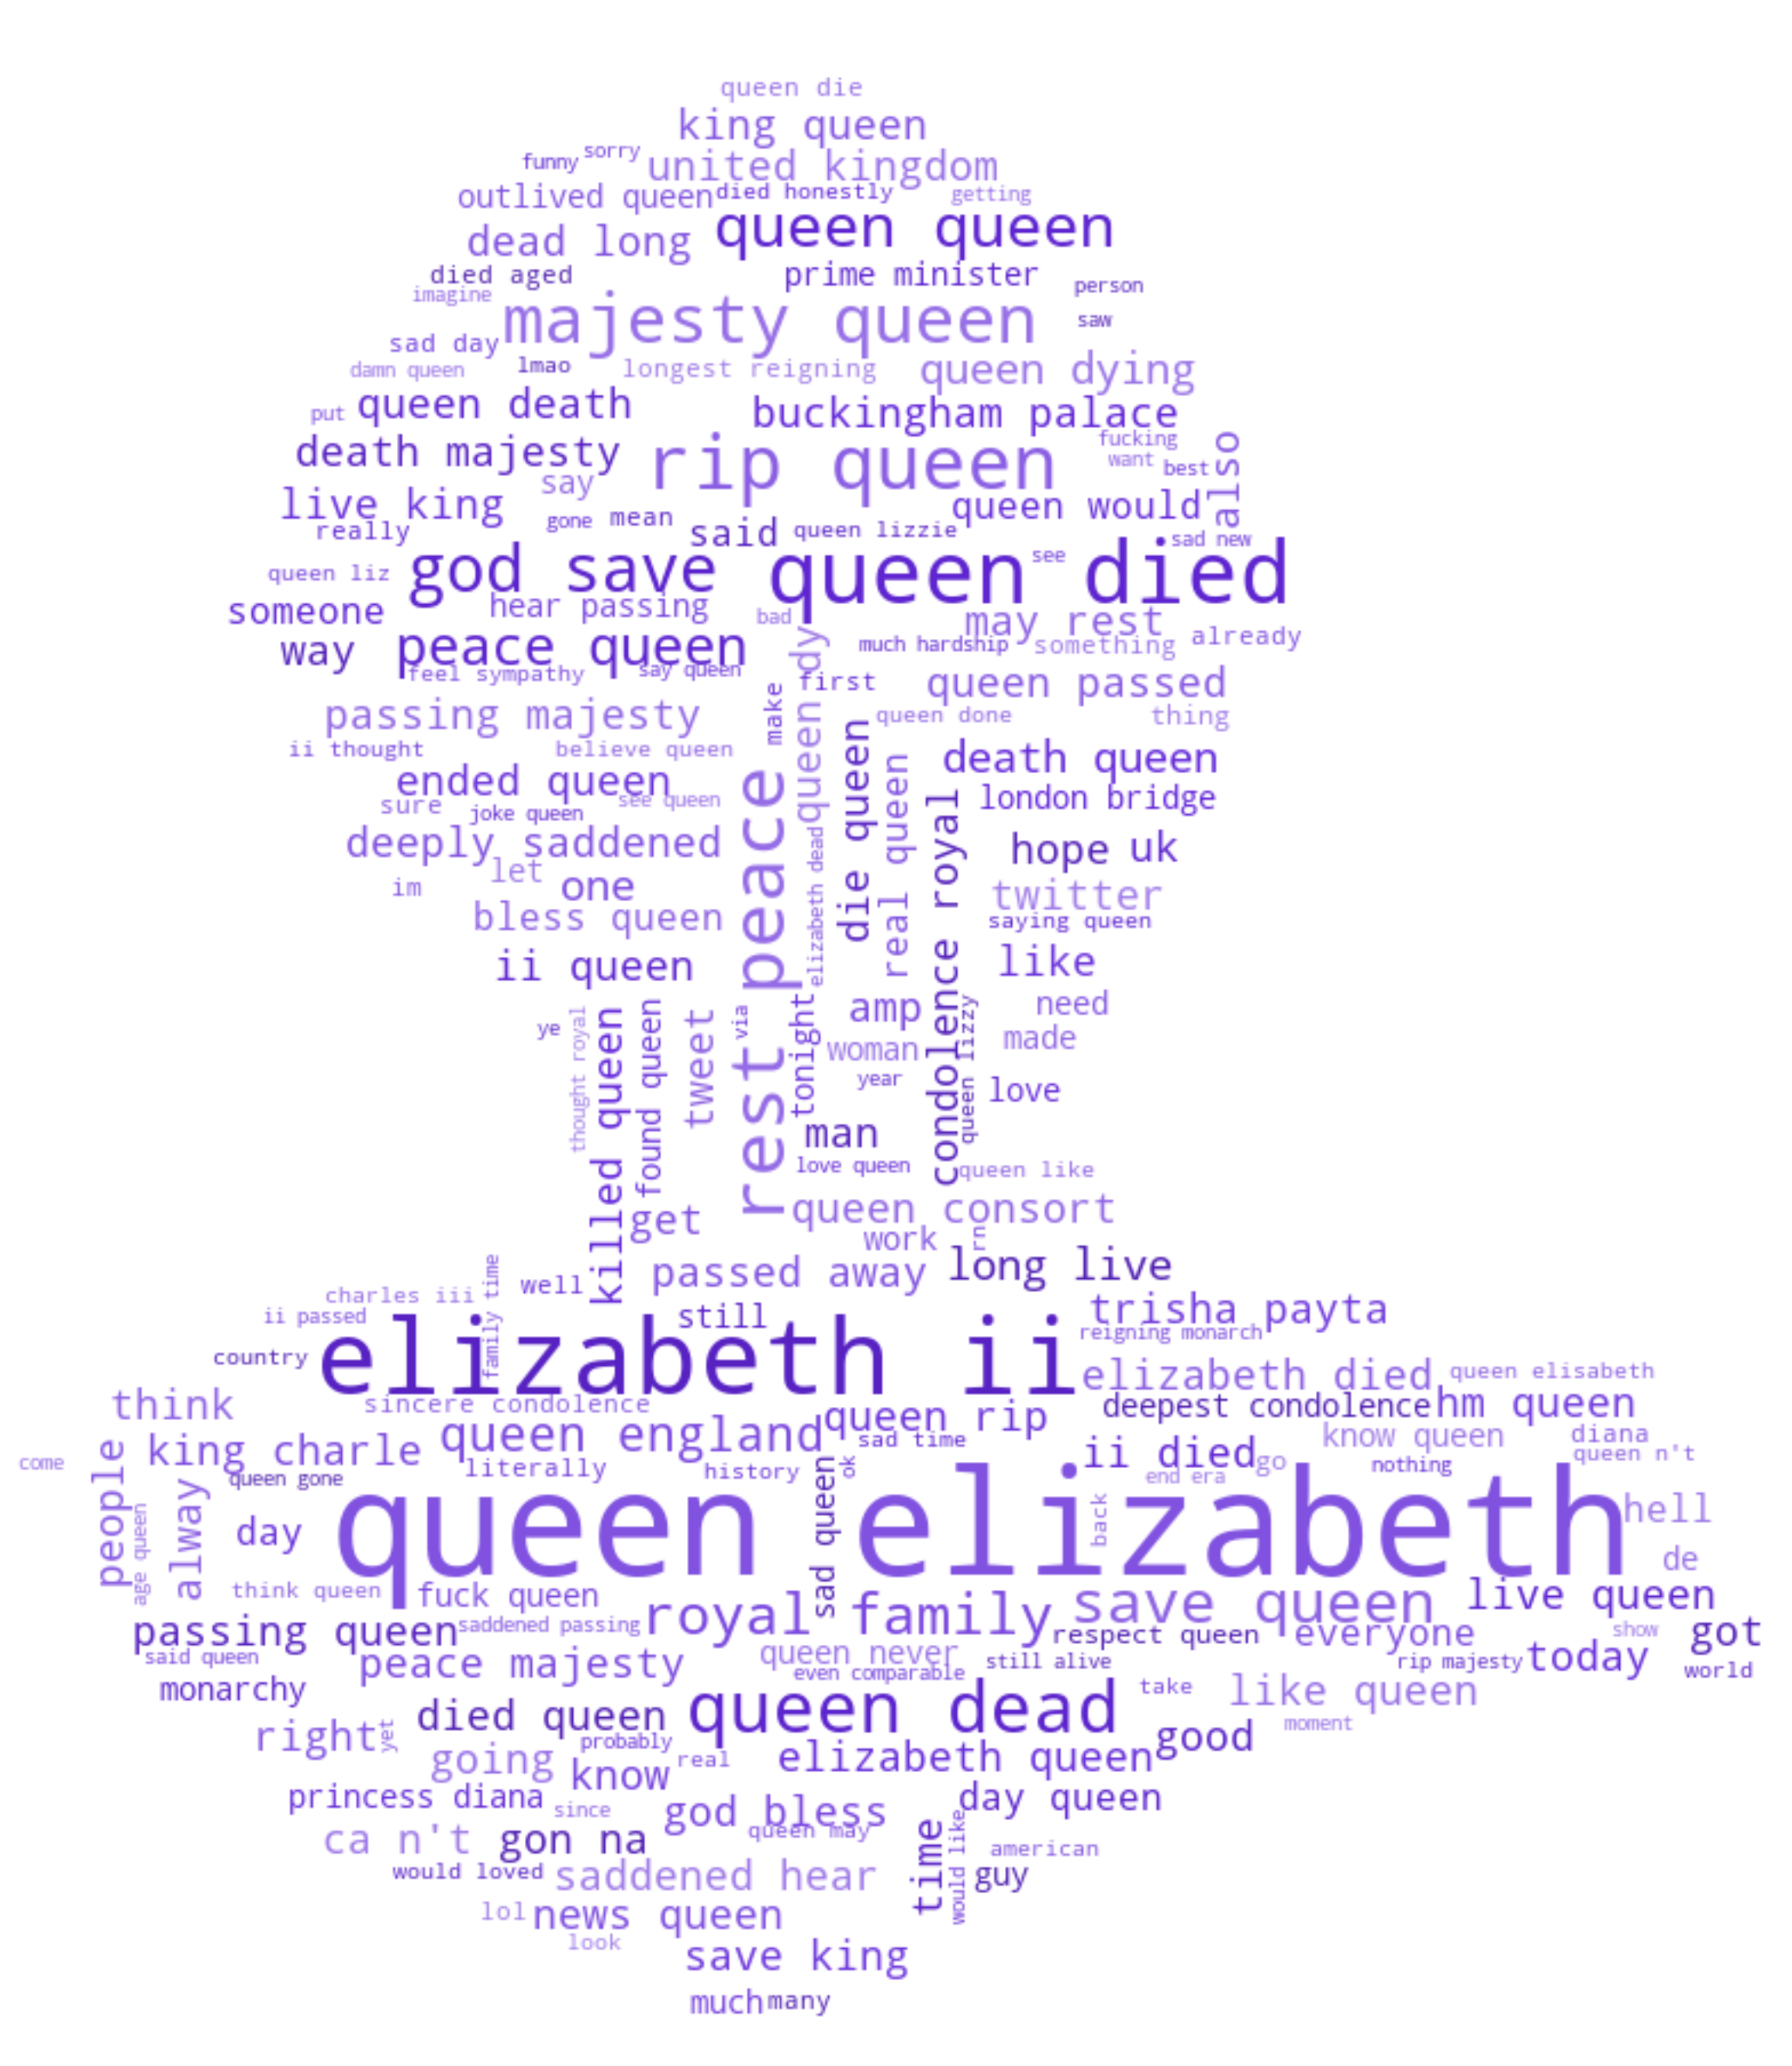

In [10]:
#stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=200, mask=mask)
wordcloud.generate(tweets_long_string)

# create twitter image
plt.figure(figsize=(80,60))
plt.imshow(wordcloud.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("QUEEN_WordCloud.png", format="png")
plt.show()

In [11]:
# Combine all words into a list
tweets_long_string = df['Processed_Tweets'].tolist()
tweets_list = []
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [12]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df_a = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_a.columns = ['Words', 'Count']
df_a.sort_values(by='Count', ascending=False, inplace=True)

In [13]:
df_a.head(10)

Words   Count
3        queen  230099
8    elizabeth   60817
9            ’   43480
96        died   26644
106         ii   26283
45          's   19134
40         rip   16974
264       rest   15694
68        dead   15155
238        god   14110

### 3. Sentiment Analysis

In [14]:
# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [15]:
# Apply all functions above to respective columns
df['Polarity']=df['Processed_Tweets'].apply(getPolarity)
df['Sentiment']=df['Polarity'].apply(getSentimentTextBlob)

In [16]:
# See quick results of the Sentiment Analysis
df['Sentiment'].value_counts()

Positive    178699
Negative     45277
Name: Sentiment, dtype: int64

In [17]:
# Create dataframe for Count of Sentiment Categories
pie_chart = df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total_Tweets').reset_index()

In [18]:
pie_chart # Display dataframe

Sentiment  Total_Tweets
0  Positive        178699
1  Negative         45277

In [19]:
colors = ['rgb(127,60,141)','rgb(217,204,216)']
sentiments_piechart = go.Figure(data=[go.Pie(labels = pie_chart.Sentiment, values = pie_chart.Total_Tweets,
                                            pull = [0,0.2], textinfo='label+percent',
                                             marker=dict(colors=colors))])
sentiments_piechart.update_layout(title="Viewers' Perception",
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})
sentiments_piechart.show()

In [21]:
# saving the file as a csv file because it took 4hrs to extract the location of 1 million tweets. 
# Analysis will be done in another notebook

df.to_csv('eliza_powerbi.csv') 

### 4. Closing Remarks and Links

The previous notebook took about 3 days to run hence i created this new notebook which includes sentiment analysis.


# Thank you for taking the time to study my notebook.

Check my social media pages for more projects.

1. [Medium](https://medium.com/@abubakarmina14)


2. [LinkedIn](https://www.linkedin.com/in/nana-amina-abubakar-9454b8115/)
